In [1]:
import numpy
import astropy.units as u
import mcmillan
from galpy import potential
from galpy.util import bovy_conversion, bovy_plot
R0, V0= 8.21*u.kpc, 233.1*u.km/u.s
%pylab inline

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:190: RuntimeWarning: divide by zero encountered in double_scalars
  ts= lambda R, trd=rd, trm=rm: numpy.exp(-trm/R-R/trd)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:194: RuntimeWarning: divide by zero encountered in double_scalars
  ((trm/R**2.-1./trd)**2.-2.*trm/R**3.)*numpy.exp(-trm/R-R/trd)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:194: RuntimeWarning: invalid value encountered in double_scalars
  ((trm/R**2.-1./trd)**2.-2.*trm/R**3.)*numpy.exp(-trm/R-R/trd)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:477: RuntimeWarning: divide by zero encountered in double_scalars
  out-= a*(s(r)*h(z)+d2s(r)*H(z)+2./r*ds(r)*(H(z)+z*dH(z)))

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:192: RuntimeWarning: divide by zero encountered in double_scalars
  (trm/R**2.-1./trd)*numpy.exp(-trm/R-R/trd)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotent

In [2]:
mcm17= mcmillan.McMillan2017

# Some tests of the McMillan (2017) potential implemented in ``galpy`` functions

## Checks against the McMillan (2017) paper

Let's check some of the numbers in Table 3 of McMillan (2017):

In [3]:
print("Kz force at the solar circle: {:.2f}"\
      .format(-potential.evaluatezforces(mcm17,8.21*u.kpc,1.1*u.kpc,use_physical=False)
              *bovy_conversion.force_in_2piGmsolpc2(V0.to(u.km/u.s).value,R0.to(u.kpc).value)))

Kz force at the solar circle: 74.09


In [4]:
print("Halo density at the solar circle: {:.4f}"\
      .format(potential.evaluateDensities(mcm17[1],8.21*u.kpc,0.,use_physical=False)
              *bovy_conversion.dens_in_msolpc3(V0.to(u.km/u.s).value,R0.to(u.kpc).value)))

Halo density at the solar circle: 0.0101


In [5]:
print("Halo concentration: {:.1f}".format(mcm17[1].conc(overdens=94.,wrtcrit=True,H=70.4)))

Halo concentration: 15.4


With the current implementation of DiskSCFPotential, we cannot compute the mass of the disk and bulge components, but let's compute that of the NFWPotenial and add the paper's number for the mass in stars and gas. The following is the total mass in units of $10^11\,M_\odot$:

In [6]:
(mcm17[1].mass(50.*u.kpc))/10.**11.+0.543+0.122

5.0999121875442341

That seems reasonable given figure 6.

The rotation curve is:

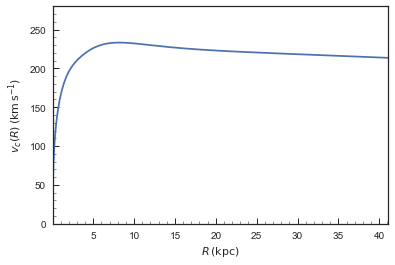

In [7]:
potential.plotRotcurve(mcm17)

which seems plausible (the rotation curve does not seem to be given by McMillan 2017).

## Some tests of the implementation

All of the potential is approximated using the ``DiskSCFPotential`` approximation, so let's test to see whether the densities that come out of the DiskSCFPotential agree with those that went in!

The following is the test of the density along lines $z = X R$ from the ``galpy`` docs (see [here](http://galpy.readthedocs.io/en/latest/potential.html#new-in-v1-2-updated-in-v1-3-general-density-potential-pairs-with-basis-function-expansions)), using the density of all but the halo. The total density (including the halo) is included as the red line, to give a sense of whether we match the density well in all regions where it matters.

/Users/bovy/Repos/orbit-estimation/py/mcmillan.py:109: RuntimeWarning: overflow encountered in cosh
  return 1./np.cosh(x)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd



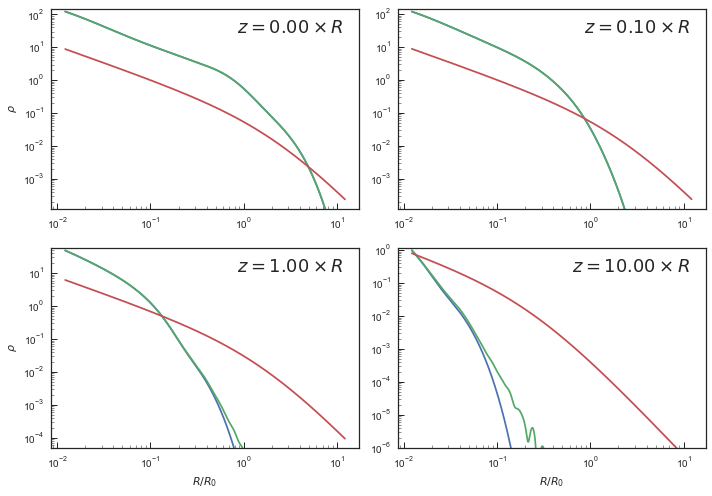

In [8]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    loglog(xs,mcmillan.bulge_gas_dens(xs,xs*X))
    loglog(xs,mcm17[0].dens(xs,xs*X,use_physical=False)+mcm17[2].dens(xs,xs*X,use_physical=False))
    loglog(xs,mcm17[1].dens(xs,xs*X,use_physical=False))
    ylim(10.**-6.*mcmillan.bulge_gas_dens(xs[0],xs[0]*X),
        1.2*mcmillan.bulge_gas_dens(xs[0],xs[0]*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
tight_layout()

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/orbit-estimation/py/mcmillan.py:109: RuntimeWarning: overflow encountered in cosh
  return 1./np.cosh(x)

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  



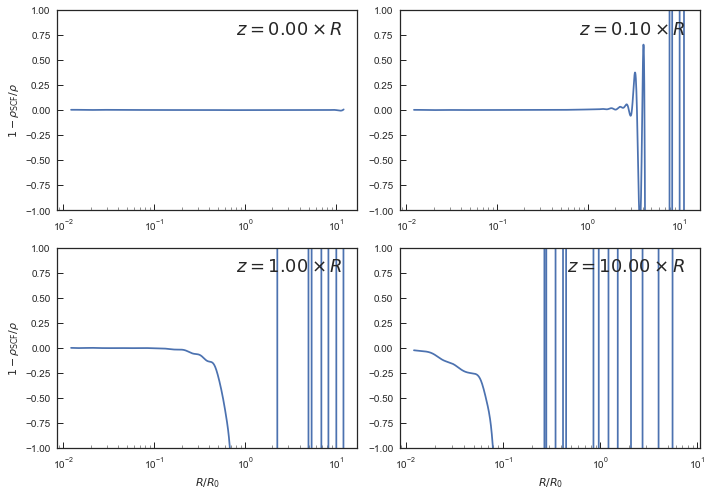

In [9]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    plot_func= semilogx
    plot_func(xs,1.-(mcm17[0].dens(xs,xs*X,use_physical=False)+mcm17[2].dens(xs,xs*X,use_physical=False))/mcmillan.bulge_gas_dens(xs,xs*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$1-\rho_{\mathrm{SCF}}/\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
    ylim(-1.,1.)
tight_layout()

Just the disks (red is now bulge + halo):

/Users/bovy/Repos/orbit-estimation/py/mcmillan.py:109: RuntimeWarning: overflow encountered in cosh
  return 1./np.cosh(x)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd



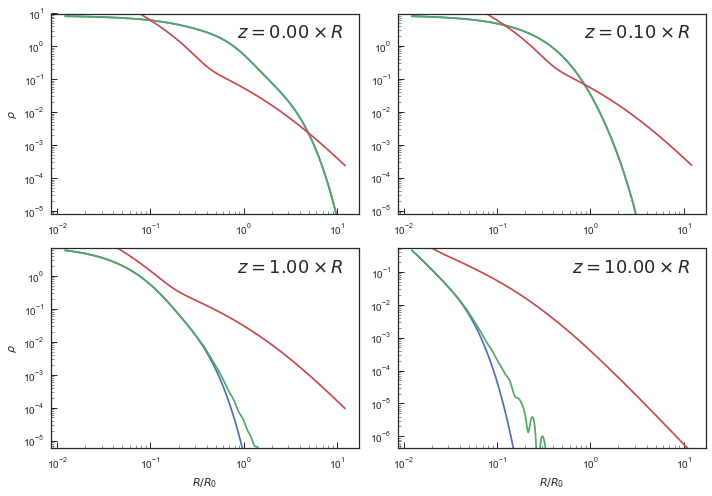

In [10]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    loglog(xs,mcmillan.gas_stellar_dens(xs,xs*X))
    loglog(xs,mcm17[0].dens(xs,xs*X,use_physical=False))
    loglog(xs,mcm17[1].dens(xs,xs*X,use_physical=False)+mcm17[2].dens(xs,xs*X,use_physical=False))
    ylim(10.**-6.*mcmillan.gas_stellar_dens(xs[0],xs[0]*X),
        1.2*mcmillan.gas_stellar_dens(xs[0],xs[0]*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
tight_layout()

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/orbit-estimation/py/mcmillan.py:109: RuntimeWarning: overflow encountered in cosh
  return 1./np.cosh(x)

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:1193: RuntimeWarning: overflow encountered in true_divide
  result = self.f(da, db, *args, **kwargs)



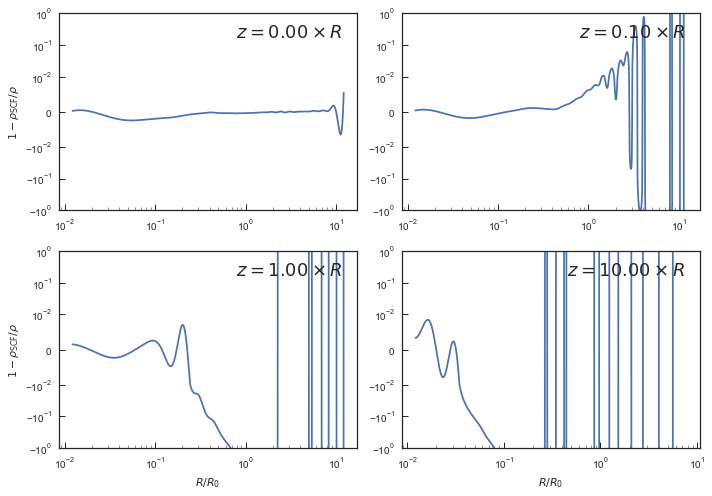

In [11]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    plot_func= semilogx
    plot_func(xs,1.-(mcm17[0].dens(xs,xs*X,use_physical=False))/mcmillan.gas_stellar_dens(xs,xs*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$1-\rho_{\mathrm{SCF}}/\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
    ylim(-1.,1.)
    yscale('symlog',linthreshy=1e-2)
tight_layout()

Just the bulge (red is now disk+halo):

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd



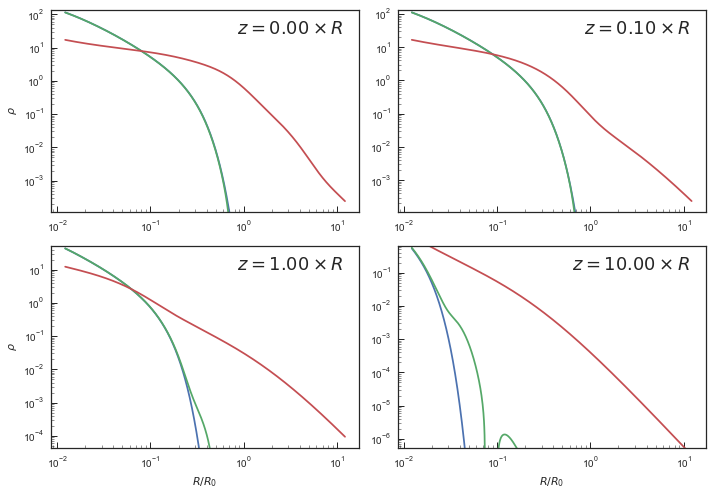

In [12]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    loglog(xs,mcmillan.bulge_dens(xs,xs*X))
    loglog(xs,mcm17[2].dens(xs,xs*X,use_physical=False))
    loglog(xs,mcm17[1].dens(xs,xs*X,use_physical=False)+mcm17[0].dens(xs,xs*X,use_physical=False))
    ylim(10.**-6.*mcmillan.bulge_dens(xs[0],xs[0]*X),
        1.2*mcmillan.bulge_dens(xs[0],xs[0]*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
tight_layout()

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:1193: RuntimeWarning: overflow encountered in true_divide
  result = self.f(da, db, *args, **kwargs)



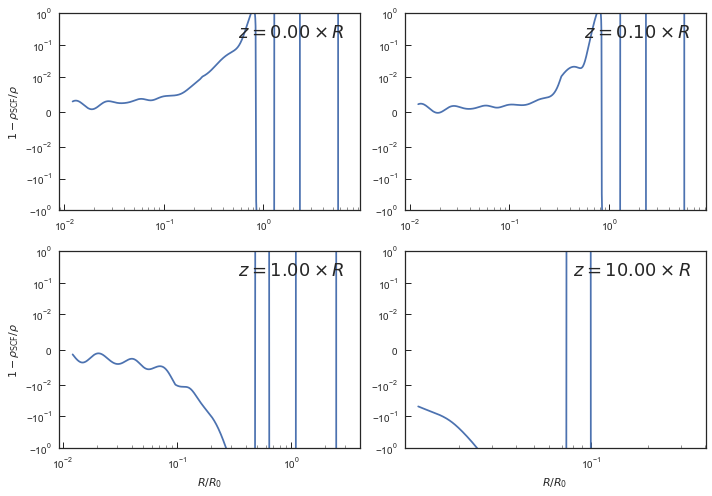

In [13]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    plot_func= semilogx
    plot_func(xs,1.-(mcm17[2].dens(xs,xs*X,use_physical=False))/mcmillan.bulge_dens(xs,xs*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$1-\rho_{\mathrm{SCF}}/\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
    ylim(-1.,1.)
    yscale('symlog',linthreshy=1e-2)
tight_layout()

## What the first of the above comparisons looked like for the old implementation

/Users/bovy/Repos/orbit-estimation/py/mcmillan.py:108: RuntimeWarning: overflow encountered in cosh
  return 1./np.cosh(x)

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd



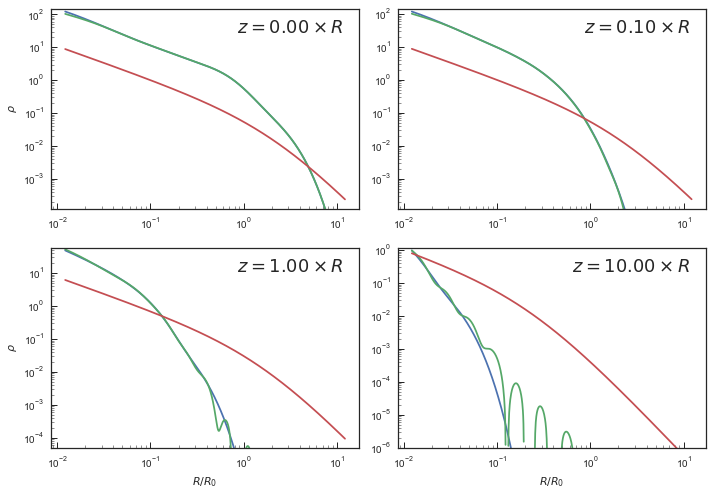

In [8]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    loglog(xs,mcmillan.bulge_gas_dens(xs,xs*X))
    loglog(xs,mcm17[0].dens(xs,xs*X,use_physical=False))
    loglog(xs,mcm17[1].dens(xs,xs*X,use_physical=False))
    ylim(10.**-6.*mcmillan.bulge_gas_dens(xs[0],xs[0]*X),
        1.2*mcmillan.bulge_gas_dens(xs[0],xs[0]*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
tight_layout()

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in square
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/galpy/galpy/potential_src/DiskSCFPotential.py:256: RuntimeWarning: overflow encountered in cosh
  th= lambda z, tzd=zd: 1./numpy.cosh(z/2./tzd)**2./4./tzd

/Users/bovy/Repos/orbit-estimation/py/mcmillan.py:108: RuntimeWarning: overflow encountered in cosh
  return 1./np.cosh(x)

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  



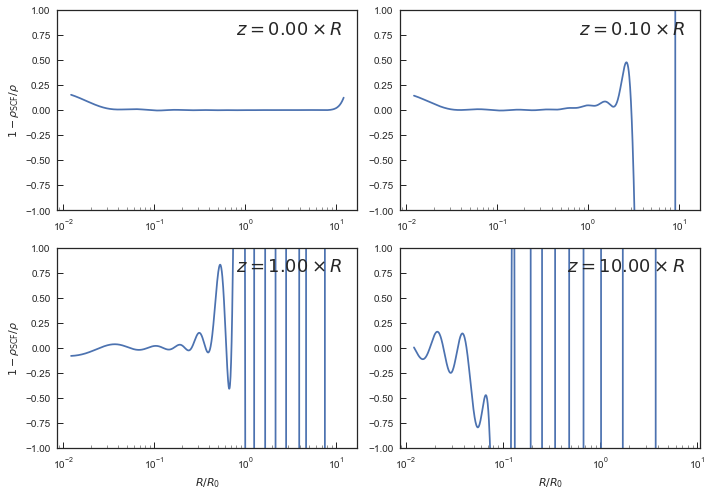

In [9]:
figsize(10,7)
Xs= [0.,1./10.,1.,10.]
xs= 10.**numpy.linspace(numpy.log10(0.1/R0.to(u.kpc).value),
                        numpy.log10(100./R0.to(u.kpc).value),1001)
for ii,X in enumerate(Xs):
    subplot(2,2,ii+1)
    plot_func= semilogx
    plot_func(xs,1.-mcm17[0].dens(xs,xs*X,use_physical=False)/mcmillan.bulge_gas_dens(xs,xs*X))
    if ii > 1: xlabel(r'$R/R_0$')
    if ii%2 < 1: ylabel(r'$1-\rho_{\mathrm{SCF}}/\rho$')
    bovy_plot.bovy_text(r'$z = {:.2f} \times R$'.format(X),size=18.,top_right=True)
    ylim(-1.,1.)
tight_layout()